In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, freqz # usado unicamente para el ejercicio de los filtros, en el diagrama de Bode

# Punto 4
Determinar la frecuencia de muestreo: Para cumplir con el teorema de Nyquist, la frecuencia de muestreo 𝑓𝑠 debe ser al menos el doble de la frecuencia máxima presente en la señal. La primera componente tiene una frecuencia angular de 𝜔 = 80𝜋, que corresponde a una frecuencia 𝑓1 = 80 / 2𝜋 = 40Hz. La segunda componente tiene 𝜔 = 40𝜋, correspondiente a 𝑓2 = 40 / 2𝜋 = 20Hz. La frecuencia máxima es 𝑓max = 40Hz. Por lo tanto, elegimos una frecuencia de muestreo 𝑓𝑠 ≥ 2⋅40 = 80Hz. Por conveniencia, tomaremos 𝑓𝑠 = 100Hz.

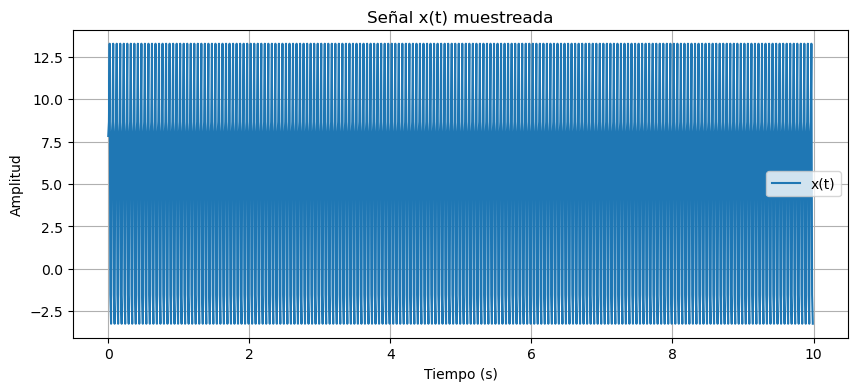

[ 7.82842712  8.65769877 13.26630812 -1.51824402 -3.23418999  7.82842712
  8.65769877 13.26630812 -1.51824402 -3.23418999  7.82842712  8.65769877
 13.26630812 -1.51824402 -3.23418999  7.82842712  8.65769877 13.26630812
 -1.51824402 -3.23418999  7.82842712  8.65769877 13.26630812 -1.51824402
 -3.23418999  7.82842712  8.65769877 13.26630812 -1.51824402 -3.23418999
  7.82842712  8.65769877 13.26630812 -1.51824402 -3.23418999  7.82842712
  8.65769877 13.26630812 -1.51824402 -3.23418999  7.82842712  8.65769877
 13.26630812 -1.51824402 -3.23418999  7.82842712  8.65769877 13.26630812
 -1.51824402 -3.23418999  7.82842712  8.65769877 13.26630812 -1.51824402
 -3.23418999  7.82842712  8.65769877 13.26630812 -1.51824402 -3.23418999
  7.82842712  8.65769877 13.26630812 -1.51824402 -3.23418999  7.82842712
  8.65769877 13.26630812 -1.51824402 -3.23418999  7.82842712  8.65769877
 13.26630812 -1.51824402 -3.23418999  7.82842712  8.65769877 13.26630812
 -1.51824402 -3.23418999  7.82842712  8.65769877 13

In [4]:
# Parámetros de la señal
k = 2 * (3 + 1) # 3 es el ultimo numero de la cedula (1001575763)
fs = 100  # Frecuencia de muestreo (Hz)
t = np.arange(0, 10, 1/fs)  # Vector de tiempo de 0 a 10 s con paso 1/fs

# Definición de la señal x(t)
x_t = 4 * np.cos(80 * np.pi * t + np.pi / 4) + k * np.sin(40 * np.pi * t) + 5

# Gráfica de la señal
plt.figure(figsize=(10, 4))
plt.plot(t, x_t, label='x(t)')
plt.title('Señal x(t) muestreada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()
plt.show()

# Muestras de la señal
print(x_t)

# Punto 5 Periodograma de welch y punto 6 Evaluacion de la rutina para verificar la funcionalidad del periodograma

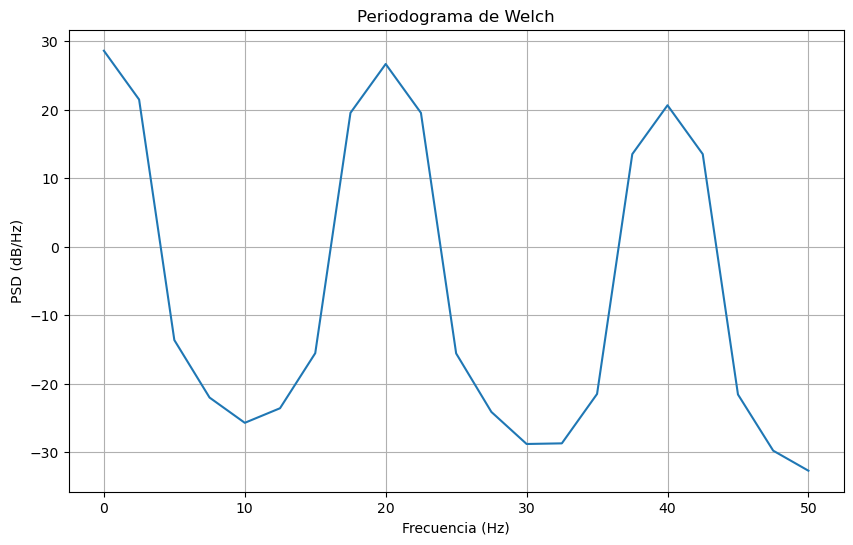

In [6]:
def welch_periodogram(signal, fs, M, overlap, window='hanning'):
    # Conversión de solapamiento a número de muestras
    S = int(M * (1 - overlap / 100))
    
    # Calcular el número de segmentos
    n_segments = (len(signal) - M) // S + 1
    
    # Crear ventana
    if window == 'hanning':
        w = np.hanning(M)
    elif window == 'hamming':
        w = np.hamming(M)
    else:
        raise ValueError("Tipo de ventana no soportado. Usa 'hanning' o 'hamming'.")
    
    # Normalización de la ventana
    W = np.sum(w**2)
    
    # Inicializar el acumulador para la PSD
    psd = np.zeros(M // 2 + 1)
    
    # Procesar cada segmento
    for i in range(n_segments):
        # Seleccionar el segmento actual
        start = i * S
        end = start + M
        segment = signal[start:end]
        
        # Verificar que el segmento tenga el tamaño correcto
        if len(segment) < M:
            break
        
        # Aplicar la ventana al segmento
        windowed_segment = segment * w
        
        # Calcular la DFT del segmento
        fft_segment = np.fft.rfft(windowed_segment)
        
        # Calcular el periodograma modificado
        Pk = (1 / W) * (np.abs(fft_segment)**2)
        
        # Acumular el periodograma
        psd += Pk
    
    # Promediar los periodogramas
    psd /= n_segments
    
    # Calcular las frecuencias
    f = np.fft.rfftfreq(M, d=1/fs)
    
    return f, psd

# Validacion de la rutina
fs = 100  # Frecuencia de muestreo
t = np.arange(0, 10, 1/fs)  # Tiempo
signal = 4 * np.cos(80 * np.pi * t + np.pi / 4) + 8 * np.sin(40 * np.pi * t) + 5

# Parámetros de Welch
M = 40  # Tamaño del segmento
overlap = 30  # Solapamiento en %
window = 'hamming'

# Calcular el periodograma
f, psd = welch_periodogram(signal, fs, M, overlap, window)

# Graficar el resultado
plt.figure(figsize=(10, 6))
plt.plot(f, 10 * np.log10(psd))  # PSD en dB
plt.title('Periodograma de Welch')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PSD (dB/Hz)')
plt.grid()
plt.show()


# Punto 7 Filtros pasa altas y pasa bajas con un rango entre 5 Hz y 50 Hz

C:\Users\santi\AppData\Local\Temp\ipykernel_14736\77054839.py:23: RuntimeWarning: divide by zero encountered in log10
  attenuation_high = 20 * np.log10(abs(h[0]))  # Atenuación en la frecuencia 0 Hz
C:\Users\santi\AppData\Local\Temp\ipykernel_14736\77054839.py:43: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 20 * np.log10(abs(h)), label=f'Orden={order_high}')


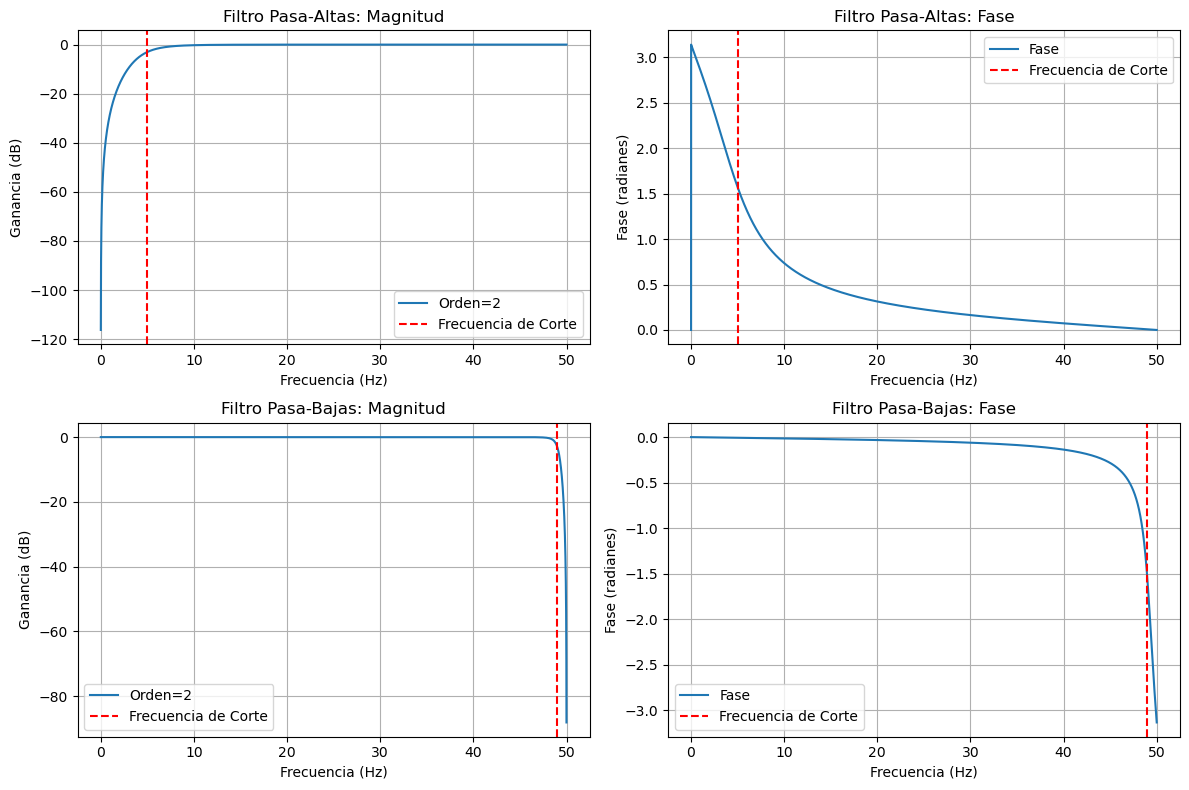

Orden del filtro pasa-altas: 2
Orden del filtro pasa-bajas: 2


In [23]:
fs = 100  # Frecuencia de muestreo (Hz)
nyquist = fs / 2  # Frecuencia de Nyquist
fc_high = 5   # Frecuencia de corte pasa-altas (Hz)
fc_low = 49   # Frecuencia de corte pasa-bajas ajustada (Hz), tuve que bajar una unidad en la frec superior
wc_high = fc_high / nyquist  # Frecuencia crítica pasa-altas (normalizada)
wc_low = fc_low / nyquist    # Frecuencia crítica pasa-bajas (normalizada)

# Validar que las frecuencias críticas estén en el rango permitido (me estaba saliendo un error que me obligó a verificar que las frecuencias criticas si estuviesen en el rango)
if not (0 < wc_high < 1):
    raise ValueError(f"Frecuencia crítica pasa-altas fuera de rango: {wc_high}")
if not (0 < wc_low < 1):
    raise ValueError(f"Frecuencia crítica pasa-bajas fuera de rango: {wc_low}")

# Atenuación
atenuacion_pasa_altas = -20  # -20 dB (10 veces menor)
atenuacion_pasa_bajas = -40  # -40 dB (100 veces menor)

# Filtro pasa-altas: para cumplir la condición de -20 dB en la banda de rechazo
order_high = 2
while True:
    b_high, a_high = butter(order_high, wc_high, btype='high', analog=False)
    w, h = freqz(b_high, a_high, worN=8000, fs=fs)
    attenuation_high = 20 * np.log10(abs(h[0]))  # Atenuación en la frecuencia 0 Hz
    if attenuation_high <= atenuacion_pasa_altas:  # Cumple con -20 dB
        break
    order_high += 1

# Filtro pasa-bajas: para cumplir la condición de -40 dB en la banda de rechazo
order_low = 2
while True:
    b_low, a_low = butter(order_low, wc_low, btype='low', analog=False)
    w_low, h_low = freqz(b_low, a_low, worN=8000, fs=fs)
    attenuation_low = 20 * np.log10(abs(h_low[-1]))  # Atenuación en la frecuencia de Nyquist
    if attenuation_low <= atenuacion_pasa_bajas:  # Cumple con -40 dB
        break
    order_low += 1

# Graficar las respuestas de magnitud y fase de ambos filtros
plt.figure(figsize=(12, 8))

# Magnitud del filtro pasa-altas
plt.subplot(2, 2, 1)
plt.plot(w, 20 * np.log10(abs(h)), label=f'Orden={order_high}')
plt.axvline(fc_high, color='red', linestyle='--', label='Frecuencia de Corte')
plt.title('Filtro Pasa-Altas: Magnitud')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Ganancia (dB)')
plt.grid()
plt.legend()

# Fase del filtro pasa-altas
plt.subplot(2, 2, 2)
angles_high = np.unwrap(np.angle(h))
plt.plot(w, angles_high, label='Fase')
plt.axvline(fc_high, color='red', linestyle='--', label='Frecuencia de Corte')
plt.title('Filtro Pasa-Altas: Fase')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Fase (radianes)')
plt.grid()
plt.legend()

# Magnitud del filtro pasa-bajas
plt.subplot(2, 2, 3)
plt.plot(w_low, 20 * np.log10(abs(h_low)), label=f'Orden={order_low}')
plt.axvline(fc_low, color='red', linestyle='--', label='Frecuencia de Corte')
plt.title('Filtro Pasa-Bajas: Magnitud')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Ganancia (dB)')
plt.grid()
plt.legend()

# Fase del filtro pasa-bajas
plt.subplot(2, 2, 4)
angles_low = np.unwrap(np.angle(h_low))
plt.plot(w_low, angles_low, label='Fase')
plt.axvline(fc_low, color='red', linestyle='--', label='Frecuencia de Corte')
plt.title('Filtro Pasa-Bajas: Fase')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Fase (radianes)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

# Imprimir órdenes finales de los filtros
print(f"Orden del filtro pasa-altas: {order_high}")
print(f"Orden del filtro pasa-bajas: {order_low}")